In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

import mitosheet

In [7]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### Unstructured Variance, n_input = 12, n_output = 1

In [22]:
df = pd.read_excel("Data/US12I1O.xlsx", index_col = 0)
df

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12,Output 1
DMU 1,283.10,373.39,246.32,164.68,272.55,268.82,363.17,682.18,566.35,162.98,535.55,413.85,242.19
DMU 2,404.94,392.55,331.58,258.61,277.84,308.75,352.59,562.98,534.73,222.18,417.08,328.26,273.17
DMU 3,403.69,380.27,321.87,269.28,302.61,235.55,342.23,512.62,572.94,223.87,478.61,357.42,249.90
DMU 4,291.89,360.24,522.68,290.59,304.74,407.75,328.30,509.44,460.15,214.07,595.50,261.86,272.52
DMU 5,364.60,365.30,393.27,265.10,291.37,289.32,314.86,438.79,481.84,209.95,532.51,278.27,312.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 996,245.33,393.08,428.09,219.36,328.27,274.48,353.92,599.22,620.43,159.59,476.54,474.55,248.97
DMU 997,392.87,388.50,340.21,224.56,333.72,254.72,335.72,522.28,512.22,193.42,459.64,308.06,282.87
DMU 998,417.06,384.84,306.15,283.03,257.11,251.25,329.68,507.39,518.90,190.48,615.73,289.19,280.64
DMU 999,366.83,371.31,520.01,231.06,368.17,310.59,341.87,336.44,463.76,222.12,425.24,307.37,299.43


In [25]:
df_sol = pd.read_excel("Data/US12I1O_Solution.xlsx", index_col = 0, header=1)
df_sol

,Efficiency
DMU,
DMU 1,0.501907
DMU 2,0.791705
DMU 3,0.565044
DMU 4,0.860990
DMU 5,0.701855
...,...
DMU 996,0.670301
DMU 997,0.741442
DMU 998,0.622777


In [26]:
import mitosheet
mitosheet.sheet(df_sol, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-83705d0b-917f-46ca-a9ac-4fed9e2d509e", "code": {"imports…

In [27]:
df_weights = pd.read_excel("Data/US12I1O_Solution.xlsx", index_col = 0, header=1, sheet_name="InputOutputWeights")
df_weights

,Efficiency,Input 9,Input 10,Input 1,Input 6,Input 12,Input 4,Input 2,Input 3,Input 7,Input 8,Input 11,Input 5,Output 1
DMU,,,,,,,,,,,,,,
DMU 1,0.501907,0.007462,0.0,0.000000,0.000000,0.000411,0.0,0.0,0.001253,0.000000,0.002144,0.000000,0.000368,0.002001
DMU 2,0.791705,0.000000,0.0,0.000000,0.000000,0.001477,0.0,0.0,0.002071,0.003432,0.000000,0.000000,0.000000,0.002124
DMU 3,0.565044,0.000000,0.0,0.000250,0.000309,0.002061,0.0,0.0,0.002169,0.000000,0.000000,0.000000,0.000000,0.001926
DMU 4,0.860990,0.008602,0.0,0.000000,0.000904,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000688,0.001861
DMU 5,0.701855,0.000000,0.0,0.000000,0.000096,0.000000,0.0,0.0,0.001487,0.000000,0.000000,0.009375,0.000000,0.001876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 996,0.670301,0.001436,0.0,0.002101,0.000000,0.000000,0.0,0.0,0.000752,0.000000,0.004488,0.000000,0.000058,0.002401
DMU 997,0.741442,0.000088,0.0,0.000000,0.000000,0.000066,0.0,0.0,0.001710,0.000000,0.000324,0.010350,0.000000,0.002153
DMU 998,0.622777,0.000000,0.0,0.000088,0.000754,0.000000,0.0,0.0,0.002191,0.000000,0.000000,0.000000,0.000869,0.001942


In [28]:
(df_weights==0).sum()

Efficiency      0
Input 9       588
Input 10      829
Input 1       302
Input 6       359
Input 12      715
Input 4       709
Input 2       805
Input 3       199
Input 7       653
Input 8       380
Input 11      741
Input 5       672
Output 1        0
dtype: int64

### ML

In [29]:
X = df
X.head()

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12,Output 1
DMU 1,283.10,373.39,246.32,164.68,272.55,268.82,363.17,682.18,566.35,162.98,535.55,413.85,242.19
DMU 2,404.94,392.55,331.58,258.61,277.84,308.75,352.59,562.98,534.73,222.18,417.08,328.26,273.17
DMU 3,403.69,380.27,321.87,269.28,302.61,235.55,342.23,512.62,572.94,223.87,478.61,357.42,249.90
DMU 4,291.89,360.24,522.68,290.59,304.74,407.75,328.30,509.44,460.15,214.07,595.50,261.86,272.52
DMU 5,364.60,365.30,393.27,265.10,291.37,289.32,314.86,438.79,481.84,209.95,532.51,278.27,312.61


In [30]:
y = df_sol
y.head()

,Efficiency
DMU,
DMU 1,0.501907
DMU 2,0.791705
DMU 3,0.565044
DMU 4,0.860990
DMU 5,0.701855


In [31]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [32]:
dt_model = DecisionTreeRegressor(random_state=42)

pipe_dt = make_pipeline(std_scaler, dt_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe_dt, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe_dt, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe_dt, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.009606109503208312
neg_root_mean_squared_error: -0.09781944085704712
r2: 0.39955878420059293


In [33]:
# specify parameter values to search
params = {}
params['decisiontreeregressor__max_depth'] = list(range(1, 15))
params['decisiontreeregressor__min_samples_split'] = list(range(10, 60, 10))
params['decisiontreeregressor__max_features'] = ["auto","log2","sqrt",None]

In [34]:
grid = GridSearchCV(pipe_dt, params, cv=5, scoring="neg_root_mean_squared_error")
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'decisiontreeregressor__max_depth': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14],
                         'decisiontreeregressor__max_features': ['auto', 'log2',
                                                                 'sqrt', None],
                         'decisiontreeregressor__min_samples_split': [10, 20,
                                                                      30, 40,
                                                                      50]},
             scoring='neg_root_mean_squared_error')

In [35]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print("r2:", cross_val_score(grid.best_estimator_, X, y, scoring="r2").mean())

-0.08895329067755568
{'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__max_features': 'auto', 'decisiontreeregressor__min_samples_split': 40}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=10, max_features='auto',
                                       min_samples_split=40,
                                       random_state=42))])
r2: 0.5031629692311662


In [36]:
imp_dt = grid.best_estimator_.steps[1][1].feature_importances_
imp_dt

array([0.  , 0.03, 0.  , 0.03, 0.  , 0.43, 0.25, 0.  , 0.02, 0.03, 0.12, 0.05, 0.06])

In [37]:
#pipe_dt.fit(X, y)
#
#imp_dt = pipe_dt.steps[1][1].feature_importances_
#imp_dt

In [38]:
df_dt = pd.DataFrame({"Feature Name":X.columns, "Importance": imp_dt}).sort_values("Importance", ascending=False)
df_dt

,Feature Name,Importance
5,Input 6,0.426848
6,Input 7,0.245563
10,Input 11,0.117327
12,Output 1,0.058958
11,Input 12,0.046648
...,...,...
8,Input 9,0.016778
0,Input 1,0.000000
2,Input 3,0.000000
4,Input 5,0.000000


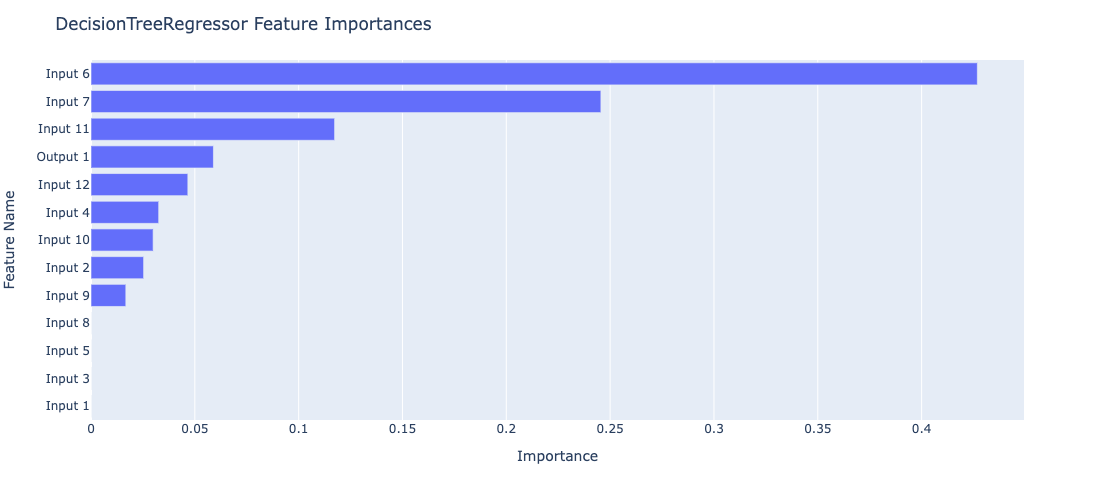

In [39]:
fig = px.bar(df_dt, x="Importance", y="Feature Name")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"DecisionTreeRegressor Feature Importances",
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

In [40]:
rf_model = RandomForestRegressor(random_state=42)

pipe_rf = make_pipeline(std_scaler, rf_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe_rf, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe_rf, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe_rf, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.004058220153604142
neg_root_mean_squared_error: -0.06359471906419023
r2: 0.7462818613692518


In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
print(n_estimators)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
print(max_depth)
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [42]:
# specify parameter values to search
params = {}
params['randomforestregressor__n_estimators'] = n_estimators
params['randomforestregressor__max_features'] = max_features
params['randomforestregressor__max_depth'] = max_depth
params['randomforestregressor__min_samples_split'] = min_samples_split
params['randomforestregressor__min_samples_leaf'] = min_samples_leaf
params['randomforestregressor__bootstrap'] = bootstrap

In [43]:
grid = RandomizedSearchCV(pipe_rf, params, cv=5, scoring="neg_root_mean_squared_error")
grid.fit(X, y.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [10,
                                                                             20,
                                                                             30,
                                                                             40,
                                                                             50,
                                                                             60,
                                

In [44]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print("r2:", cross_val_score(grid.best_estimator_, X, y.values.ravel(), scoring="r2").mean())

-0.06209504663460465
{'randomforestregressor__n_estimators': 600, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_depth': 100, 'randomforestregressor__bootstrap': False}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, max_depth=100,
                                       max_features='sqrt', min_samples_split=5,
                                       n_estimators=600, random_state=42))])
r2: 0.7584695048151524


In [45]:
imp_rf = grid.best_estimator_.steps[1][1].feature_importances_
imp_rf

array([0.03, 0.03, 0.04, 0.06, 0.02, 0.2 , 0.18, 0.04, 0.11, 0.06, 0.08, 0.06, 0.09])

In [46]:
#pipe_rf.fit(X, y.values.ravel())
#
#imp_rf = pipe_rf.steps[1][1].feature_importances_

In [47]:
df_rf = pd.DataFrame({"Feature Name":X.columns, "Importance": imp_rf}).sort_values("Importance", ascending=False)
df_rf

,Feature Name,Importance
5,Input 6,0.198153
6,Input 7,0.181102
8,Input 9,0.110291
12,Output 1,0.092083
10,Input 11,0.082571
...,...,...
7,Input 8,0.038291
2,Input 3,0.036506
1,Input 2,0.033752
0,Input 1,0.026472


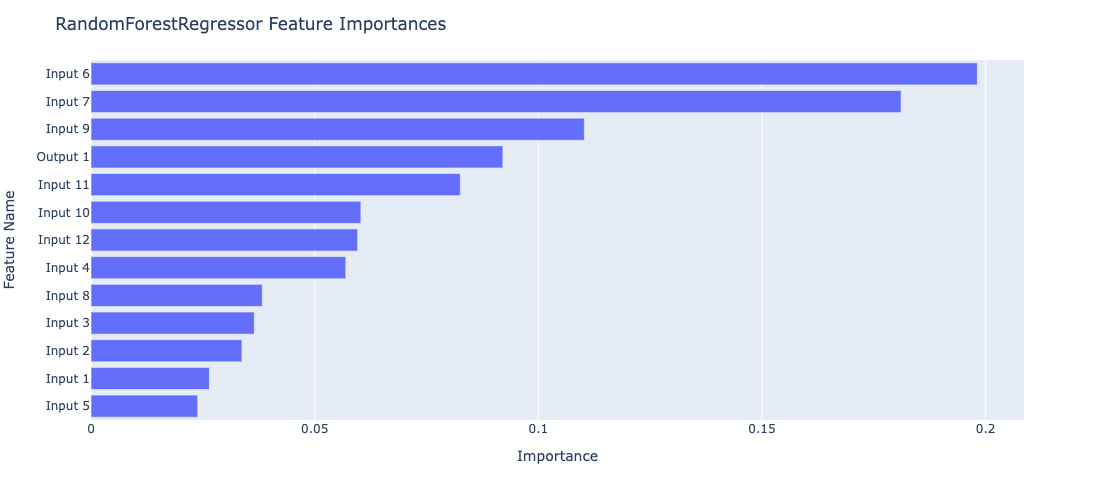

In [48]:
fig = px.bar(df_rf, x="Importance", y="Feature Name")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"RandomForestRegressor Feature Importances",
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

In [51]:
gb_model = GradientBoostingRegressor(random_state=42)

pipe_gb = make_pipeline(std_scaler, gb_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe_gb, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe_gb, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe_gb, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0028575799970271057
neg_root_mean_squared_error: -0.053389925052819295
r2: 0.8193590527713255


In [52]:
#learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
#n_estimators = [200, 500, 1000, 2000]
#max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
#print(max_depth)
#max_depth.append(None)
## Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
## Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]

In [75]:
learning_rate = [1, 0.5, 0.1,  0.01]
n_estimators = [50, 100, 200, 500, 1000, 2000]
max_depth = [3, 5, 10, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
subsample = [0.3, 0.5, 0.75, 1.0]

In [76]:
# specify parameter values to search
params = {}
params['gradientboostingregressor__learning_rate'] = learning_rate
params['gradientboostingregressor__n_estimators'] = n_estimators
params['gradientboostingregressor__max_depth'] = max_depth
params['gradientboostingregressor__min_samples_split'] = min_samples_split
params['gradientboostingregressor__min_samples_leaf'] = min_samples_leaf
params['gradientboostingregressor__subsample'] = subsample

In [77]:
grid = RandomizedSearchCV(pipe_gb, params, cv=5, scoring="neg_root_mean_squared_error")
grid.fit(X, y.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('gradientboostingregressor',
                                              GradientBoostingRegressor(random_state=42))]),
                   param_distributions={'gradientboostingregressor__learning_rate': [1,
                                                                                     0.5,
                                                                                     0.1,
                                                                                     0.01],
                                        'gradientboostingregressor__max_depth': [3,
                                                                                 5,
                                                                                 10,
                                                                 

In [56]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print("r2:", cross_val_score(grid.best_estimator_, X, y.values.ravel(), scoring="r2").mean())

-0.04693717976954317
{'gradientboostingregressor__subsample': 0.3, 'gradientboostingregressor__n_estimators': 200, 'gradientboostingregressor__min_samples_split': 5, 'gradientboostingregressor__min_samples_leaf': 1, 'gradientboostingregressor__max_depth': 5, 'gradientboostingregressor__learning_rate': 0.1}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=5, min_samples_split=5,
                                           n_estimators=200, random_state=42,
                                           subsample=0.3))])
r2: 0.85880294108463


In [57]:
imp_gb = grid.best_estimator_.steps[1][1].feature_importances_
imp_gb

array([0.03, 0.04, 0.05, 0.06, 0.03, 0.21, 0.17, 0.05, 0.06, 0.05, 0.11, 0.07, 0.07])

In [58]:
#pip_gb.fit(X, y.values.ravel())
#
#imp_gb = pip_gb.steps[1][1].feature_importances_

In [59]:
df_gb = pd.DataFrame({"Feature Name":X.columns, "Importance": imp_gb}).sort_values("Importance", ascending=False)
df_gb

,Feature Name,Importance
5,Input 6,0.211247
6,Input 7,0.168965
10,Input 11,0.108446
12,Output 1,0.074462
11,Input 12,0.072041
...,...,...
9,Input 10,0.050298
2,Input 3,0.045089
1,Input 2,0.038861
4,Input 5,0.029027


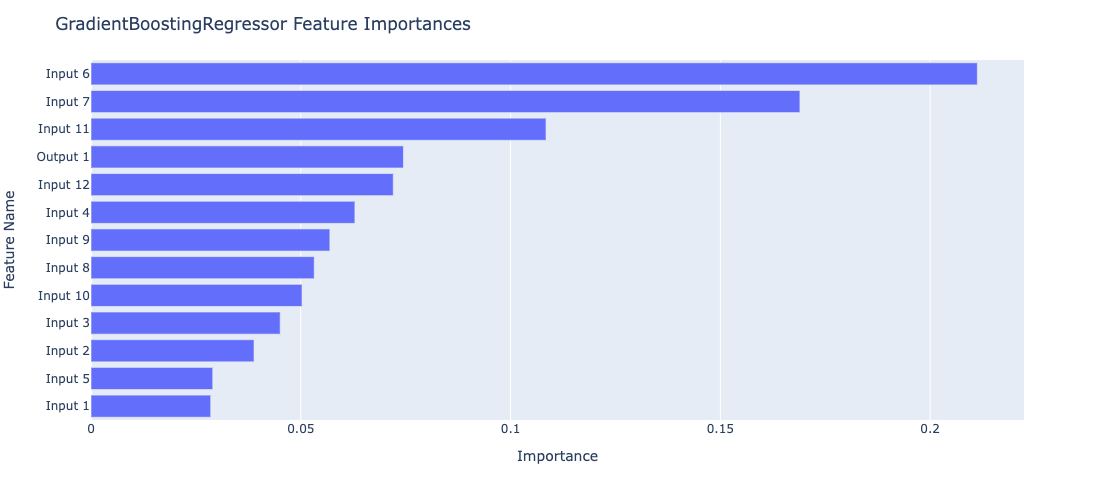

In [60]:
fig = px.bar(df_gb, x="Importance", y="Feature Name")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"GradientBoostingRegressor Feature Importances",
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

In [61]:
xgb_model = xgb.XGBRegressor(random_state=42)

pipe_xgb = make_pipeline(std_scaler, xgb_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe_xgb, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe_xgb, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe_xgb, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.003357747841388777
neg_root_mean_squared_error: -0.057925710294792085
r2: 0.7890659792568415


In [62]:
# xgb.plot_tree(xgb_model,num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 10]
# plt.show()

In [63]:
learning_rate = [0.01, 0.1, 0.2, 0.3]
n_estimators = [100, 500, 1000]
max_depth =  [3, 5, 6, 10, 15, 20]
subsample = np.arange(0.5, 1.0, 0.1)
colsample_bytree = np.arange(0.4, 1.0, 0.1)
colsample_bylevel = np.arange(0.4, 1.0, 0.1)

In [64]:
# specify parameter values to search
params = {}
params['xgbregressor__learning_rate'] = learning_rate
params['xgbregressor__n_estimators'] = n_estimators
params['xgbregressor__max_depth'] = max_depth
params['xgbregressor__subsample'] = subsample
params['xgbregressor__colsample_bytree'] = colsample_bytree
params['xgbregressor__colsample_bylevel'] = colsample_bylevel

In [65]:
grid = RandomizedSearchCV(pipe_xgb, params, cv=5, scoring="neg_root_mean_squared_error")
grid.fit(X, y.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           enable_categorical=False,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           importance_type=None,
                                                           interaction_constrai

In [66]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print("r2:", cross_val_score(grid.best_estimator_, X, y.values.ravel(), scoring="r2").mean())

-0.045062852051164934
{'xgbregressor__subsample': 0.7, 'xgbregressor__n_estimators': 500, 'xgbregressor__max_depth': 3, 'xgbregressor__learning_rate': 0.2, 'xgbregressor__colsample_bytree': 0.8999999999999999, 'xgbregressor__colsample_bylevel': 0.7999999999999999}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=0.7999999999999999,
                              colsample_bynode=1,
                              colsample_bytree=0.8999999999999999,
                              enable_categorical=False, gamma=0, gpu_id=-1,
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.2, max_delta_step=0, max_depth=3,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=500,
                         

In [67]:
imp_xgb = grid.best_estimator_.steps[1][1].feature_importances_
imp_xgb

array([0.02, 0.02, 0.04, 0.04, 0.02, 0.26, 0.14, 0.05, 0.09, 0.05, 0.1 , 0.06, 0.09], dtype=float32)

In [68]:
df_xgb = pd.DataFrame({"Feature Name":X.columns, "Importance": imp_xgb}).sort_values("Importance", ascending=False)
df_xgb

,Feature Name,Importance
5,Input 6,0.264759
6,Input 7,0.144874
10,Input 11,0.104755
8,Input 9,0.092739
12,Output 1,0.088944
...,...,...
3,Input 4,0.043000
2,Input 3,0.035760
1,Input 2,0.023944
4,Input 5,0.021285


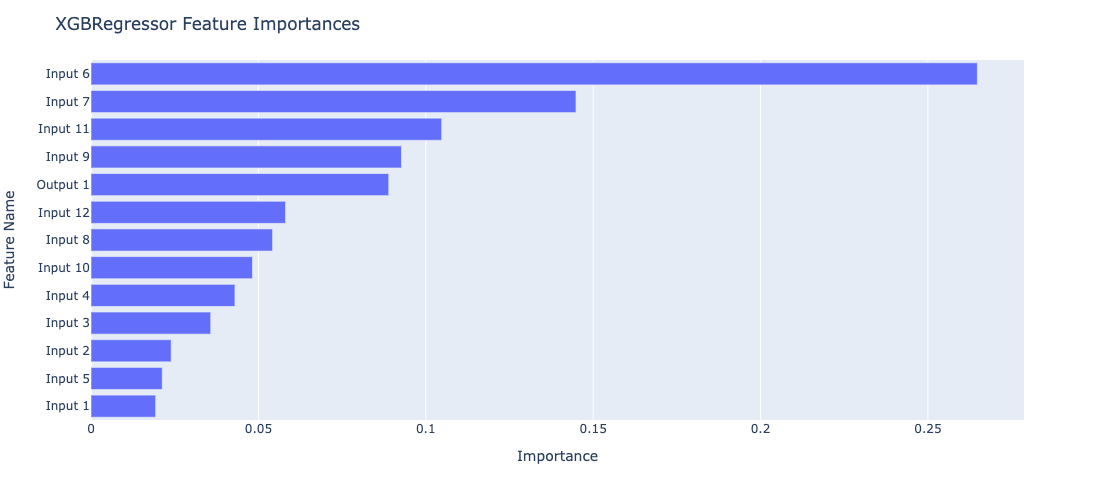

In [74]:
fig = px.bar(df_xgb, x="Importance", y="Feature Name")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"XGBRegressor Feature Importances",
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

In [70]:
pipe_xgb.fit(X, y.values.ravel())

pipe_xgb.steps[1][1].feature_importances_

array([0.01, 0.02, 0.02, 0.04, 0.02, 0.31, 0.21, 0.04, 0.04, 0.05, 0.12, 0.08, 0.05], dtype=float32)

In [71]:
pipe_xgb.steps[1][1].get_booster().get_score(importance_type='cover')

{'f0': 93.63636016845703,
 'f1': 119.32012939453125,
 'f2': 153.0570526123047,
 'f3': 137.47080993652344,
 'f4': 207.02499389648438,
 'f5': 200.5447998046875,
 'f6': 208.13943481445312,
 'f7': 239.375,
 'f8': 185.0386199951172,
 'f9': 163.4064178466797,
 'f10': 205.13616943359375,
 'f11': 205.83981323242188,
 'f12': 194.14169311523438}

In [72]:
plt.rcParams['figure.figsize'] = [12, 10]

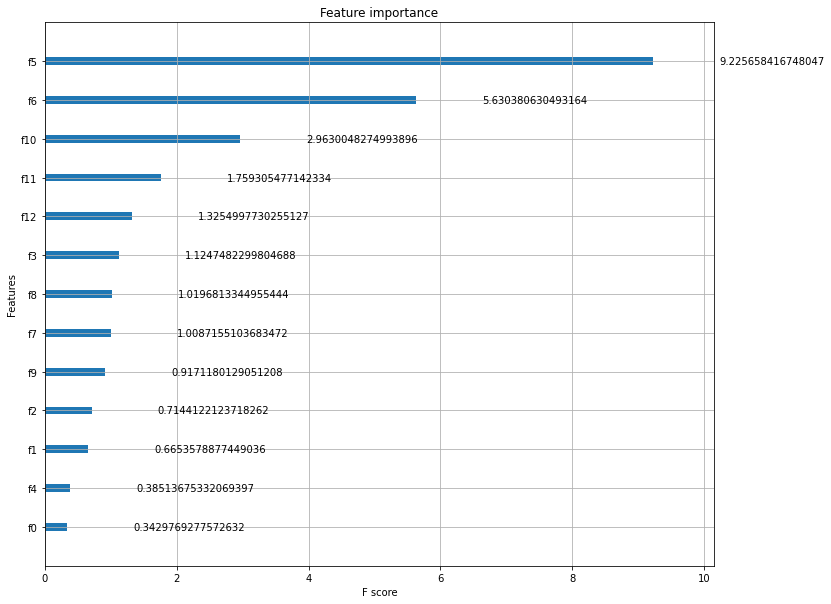

In [73]:
xgb.plot_importance(pipe_xgb.steps[1][1]._Booster, importance_type='total_gain')
plt.show()